<a href="https://colab.research.google.com/github/vikastrivedi0/comp313-002-Team-5-F23/blob/Manipal/CostcoStockPredictionLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

url = "https://raw.githubusercontent.com/vikastrivedi0/StockPricePrediction-Costco-LSTM/main/Costco-Stock-Prices-Datset.csv"

df = pd.read_csv(url)

df.head()

Date            Time       Open       High        Low      Close  \
0  2000-01-03  00:00:00-05:00  31.512873  31.512873  30.431443  30.799129   
1  2000-01-04  00:00:00-05:00  30.777503  30.842389  29.047215  29.112101   
2  2000-01-05  00:00:00-05:00  29.220253  29.717711  28.960709  29.609568   
3  2000-01-06  00:00:00-05:00  29.977260  30.842405  29.934003  30.204361   
4  2000-01-07  00:00:00-05:00  30.063773  32.269891  30.042144  32.205006   

    Volume Brand_Name Ticker Industry_Tag Country  Dividends  Stock Splits  
0  6057400     costco   COST       retail     usa        0.0             0  
1  5722800     costco   COST       retail     usa        0.0             0  
2  7726400     costco   COST       retail     usa        0.0             0  
3  7221400     costco   COST       retail     usa        0.0             0  
4  5164800     costco   COST       retail     usa        0.0             0

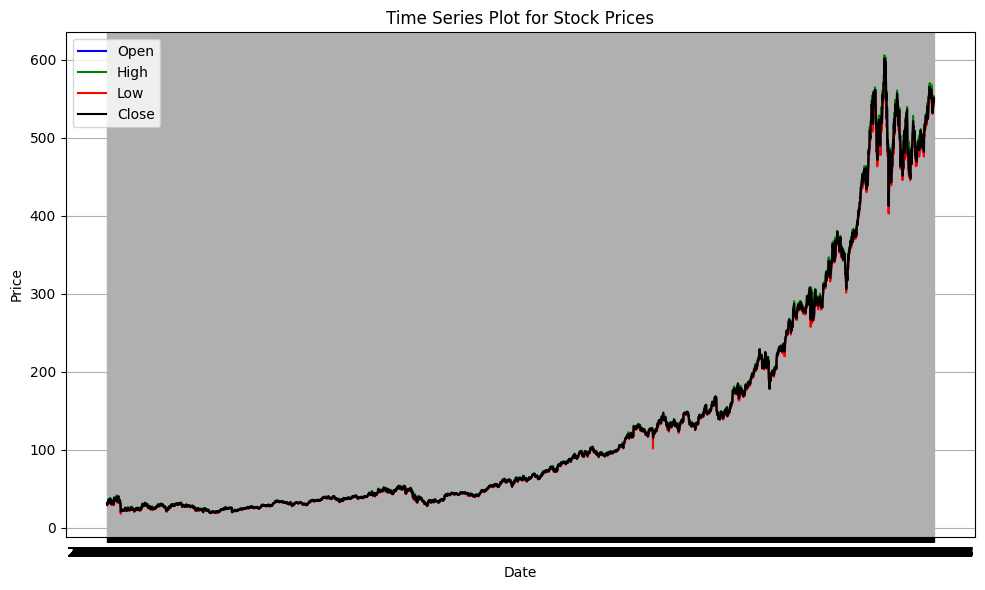

In [ ]:

#Open, High, Low & Close plot combined

plt.figure(figsize=(10,6))

plt.plot(df['Date'], df['Open'], label='Open', color='blue')
plt.plot(df['Date'], df['High'], label='High', color='green')
plt.plot(df['Date'], df['Low'], label='Low', color='red')
plt.plot(df['Date'], df['Close'], label='Close', color='black')

plt.title('Time Series Plot for Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


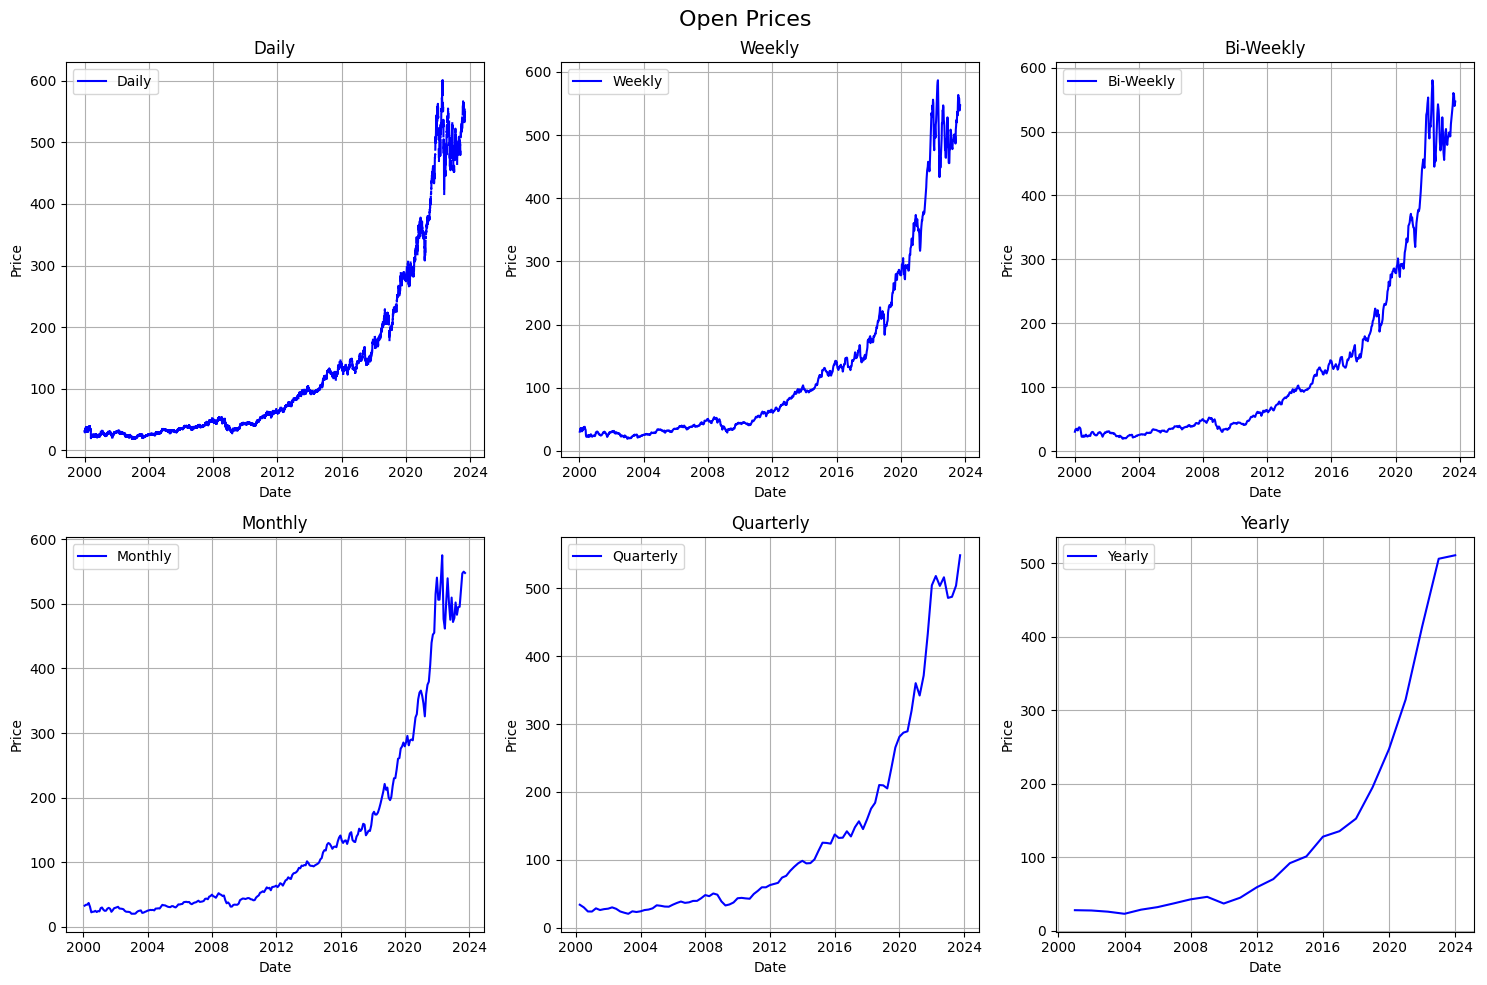

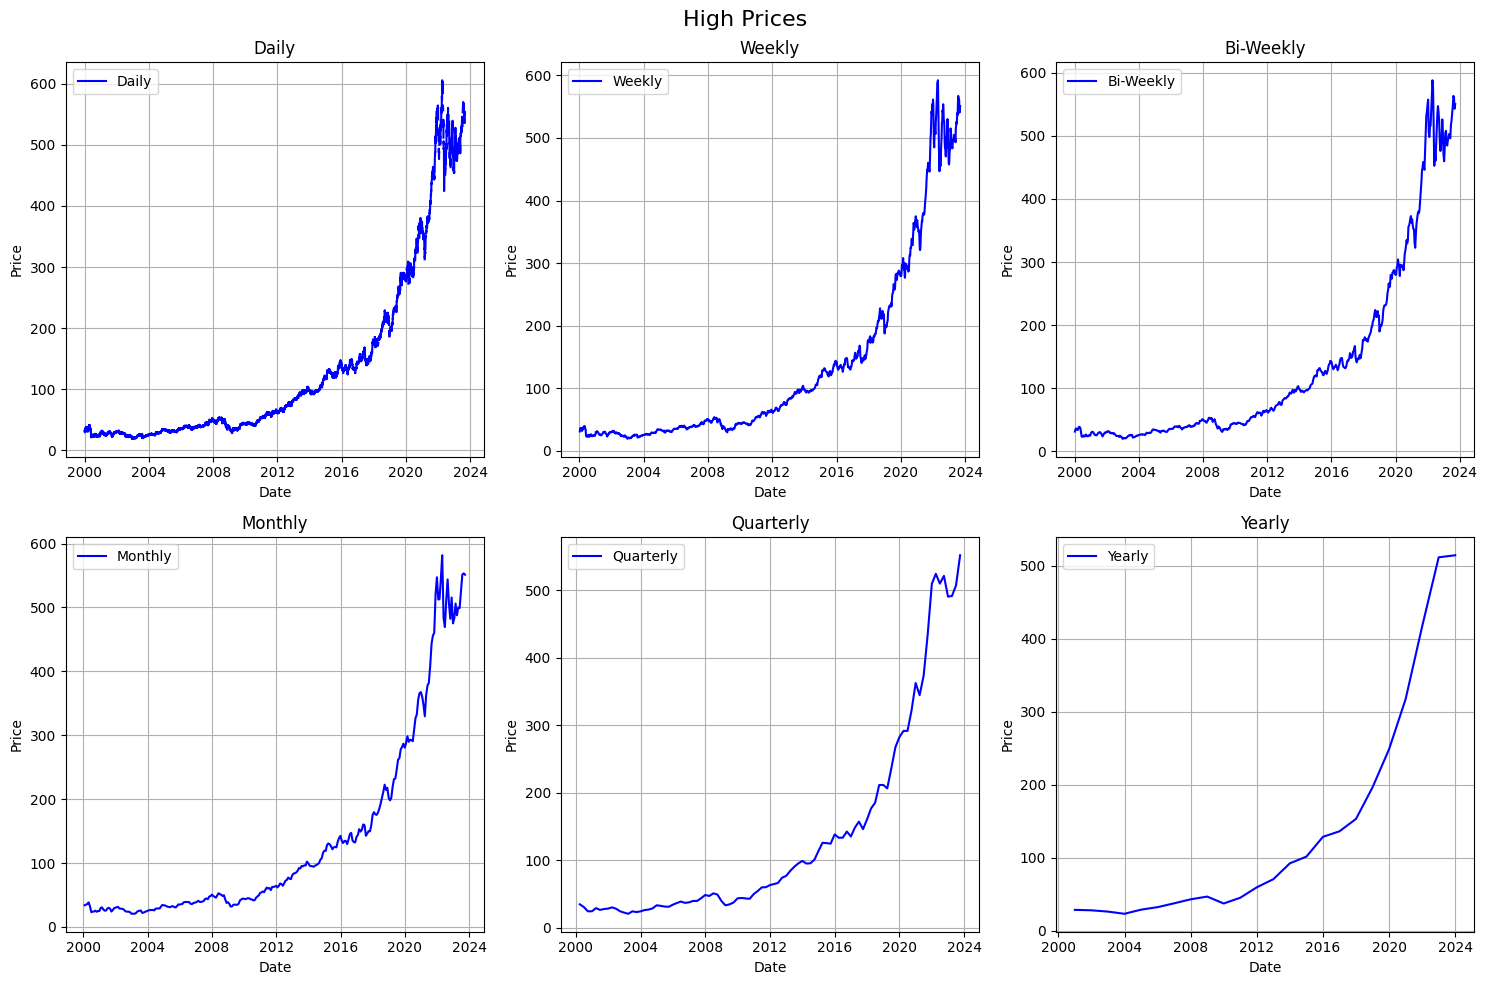

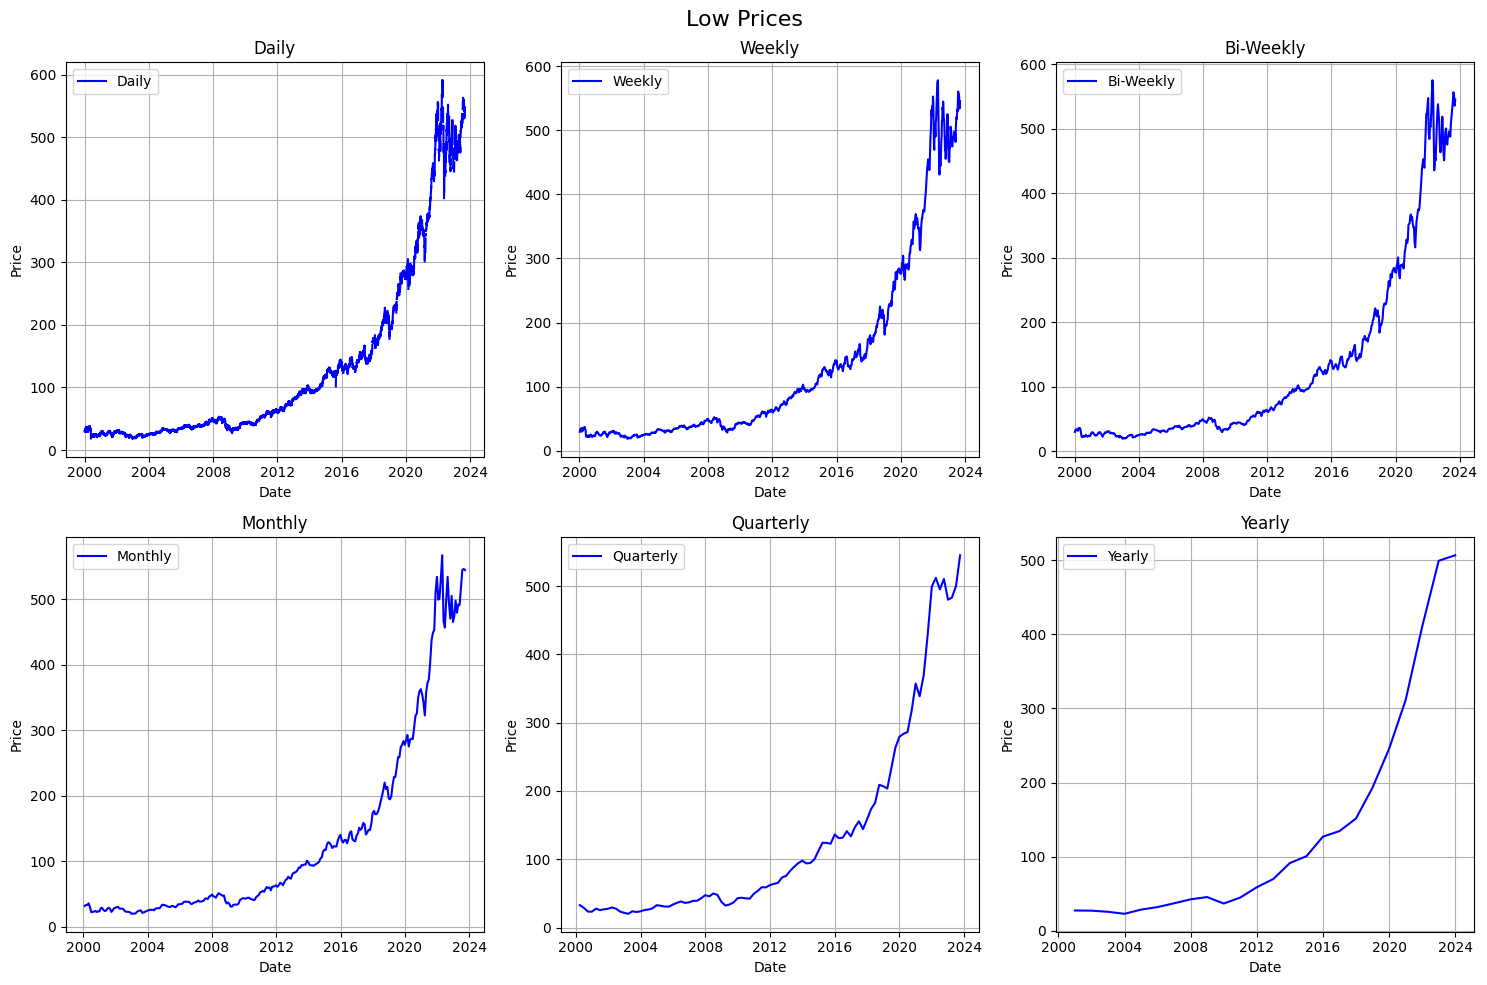

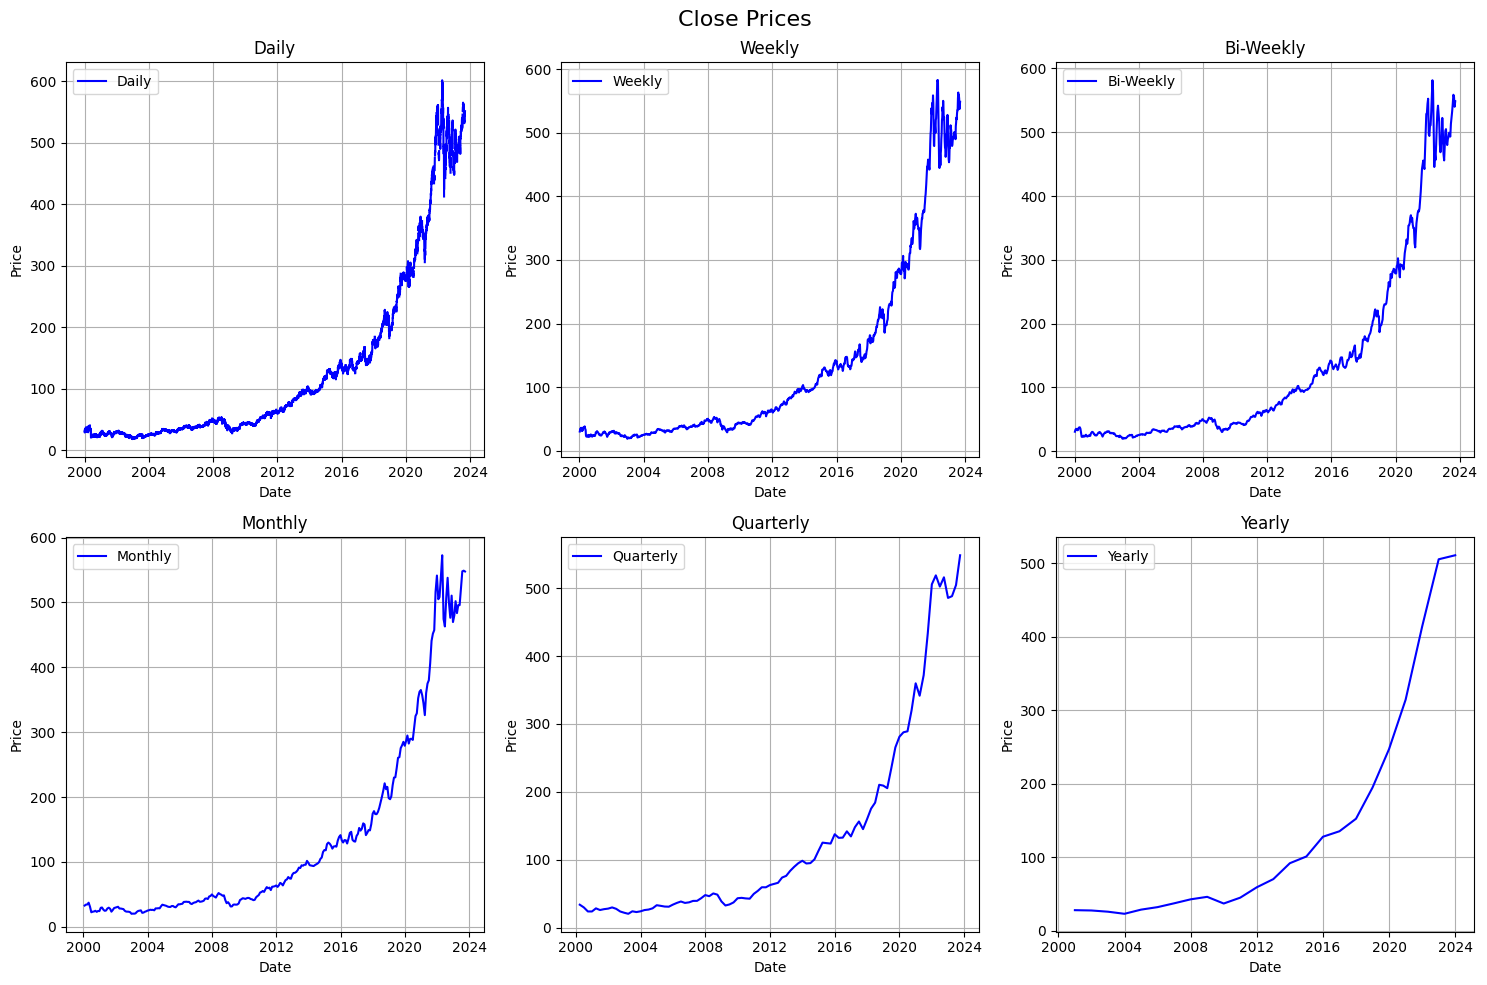

In [ ]:
#fucntion to plot each column per frequency

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

def plot_column_with_subplot(ax, df, column, freq, title):
    df_resampled = df[column].resample(freq).mean()
    ax.plot(df_resampled, label=title, color='blue')

    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid(True)

columns = ['Open', 'High', 'Low', 'Close']
frequencies = [
    ('D', 'Daily'),
    ('W', 'Weekly'),
    ('2W', 'Bi-Weekly'),
    ('M', 'Monthly'),
    ('Q', 'Quarterly'),
    ('A', 'Yearly')
]

for column in columns:
    fig, axs = plt.subplots(2, 3, figsize=(15, 10), tight_layout=True)
    fig.suptitle(f"{column} Prices", fontsize=16)

    for ax, (freq, freq_name) in zip(axs.ravel(), frequencies):
        title = f"{freq_name}"
        plot_column_with_subplot(ax, df, column, freq, title)

plt.show()


<ipython-input-6-e50561ef3033>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(freq).mean()
<ipython-input-6-e50561ef3033>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(freq).mean()
<ipython-input-6-e50561ef3033>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(freq).mean()
<ipython-input-6-e50561ef3033>:2: FutureWarning: The default 

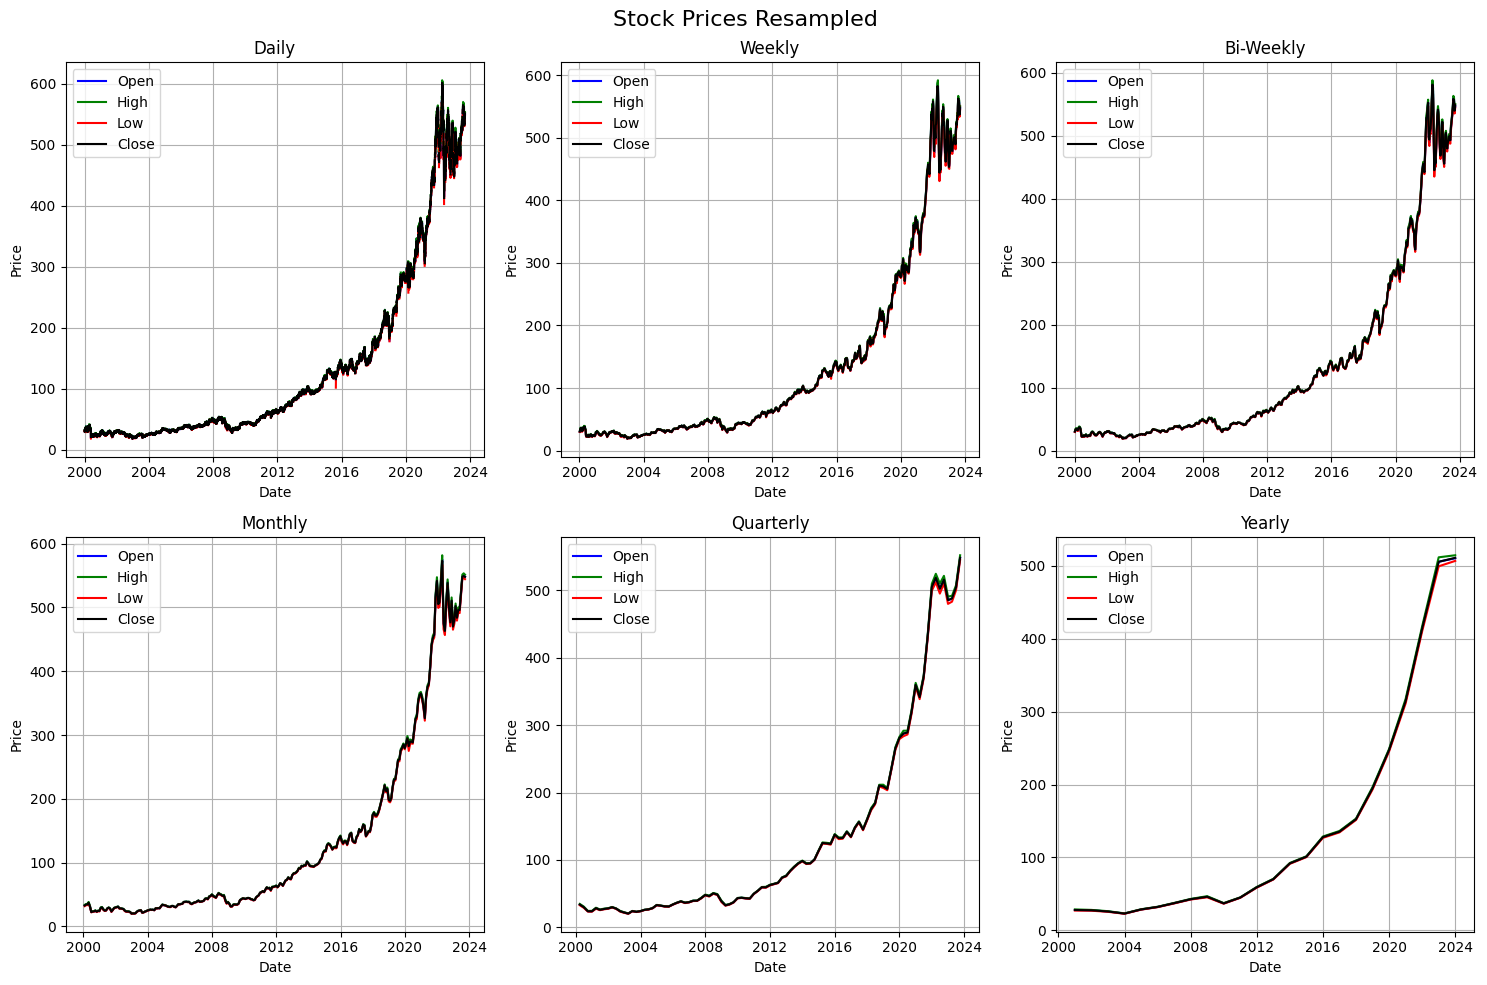

In [ ]:

def plot_combined_columns_subplot(ax, df, freq, title):
    df_resampled = df.resample(freq).mean()

    ax.plot(df_resampled['Open'], label='Open', color='blue')
    ax.plot(df_resampled['High'], label='High', color='green')
    ax.plot(df_resampled['Low'], label='Low', color='red')
    ax.plot(df_resampled['Close'], label='Close', color='black')

    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid(True)

frequencies = [
    ('D', 'Daily'),
    ('W', 'Weekly'),
    ('2W', 'Bi-Weekly'),
    ('M', 'Monthly'),
    ('Q', 'Quarterly'),
    ('A', 'Yearly')
]

fig, axs = plt.subplots(2, 3, figsize=(15, 10), tight_layout=True)
fig.suptitle(f"Stock Prices Resampled", fontsize=16)

for ax, (freq, freq_name) in zip(axs.ravel(), frequencies):
    title = f"{freq_name}"
    plot_combined_columns_subplot(ax, df, freq, title)

plt.show()


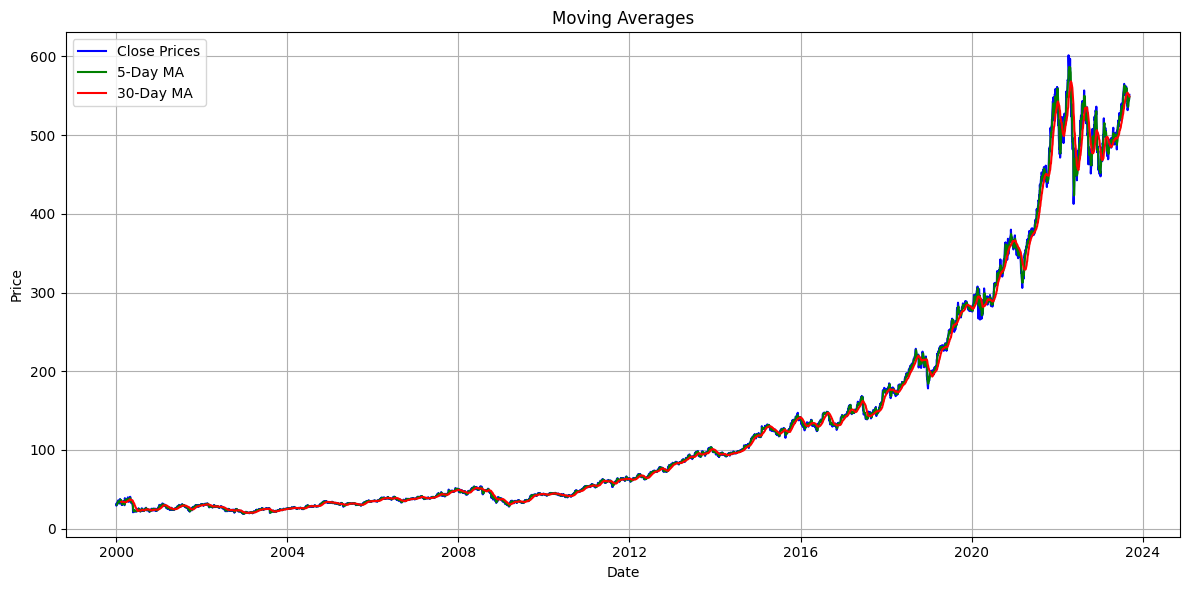

<ipython-input-7-09b3e0e27874>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


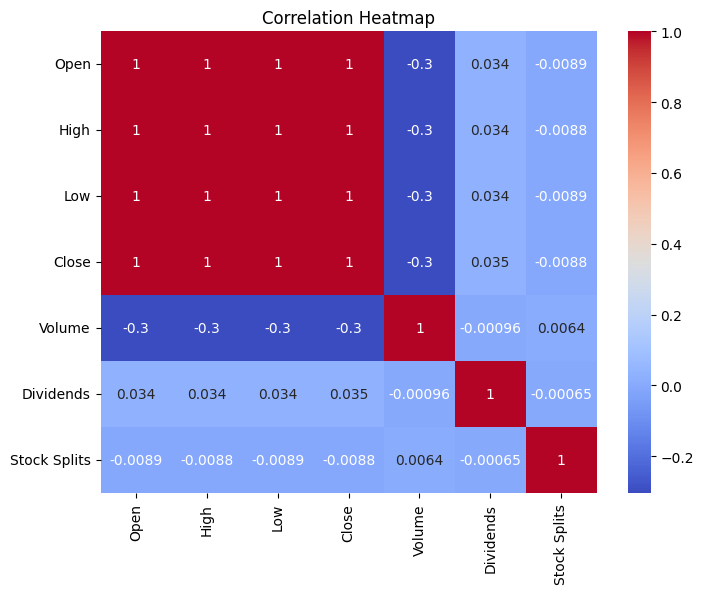

In [ ]:
import seaborn as sns

# Moving Averages
def plot_moving_average(df):
    ma_short = df['Close'].rolling(window=5).mean()  # Short term moving average
    ma_long = df['Close'].rolling(window=30).mean()  # Long term moving average

    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label='Close Prices', color='blue')
    plt.plot(ma_short, label='5-Day MA', color='green')
    plt.plot(ma_long, label='30-Day MA', color='red')
    plt.title('Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_moving_average(df)

# Correlation Heatmap
def plot_corr_heatmap(df):
    correlation = df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

plot_corr_heatmap(df)


In [ ]:
pip install mplfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.4 MB/s eta 0:00:00


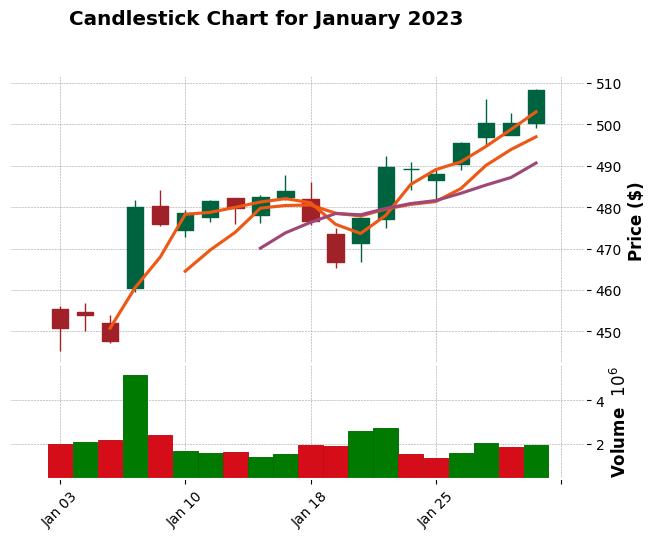

In [ ]:
import mplfinance as mpf

df_subset = df['2023-01-01':'2023-01-31']

mpf.plot(df_subset, type='candle', style='charles',
         title='Candlestick Chart for January 2023',
         ylabel='Price ($)',
         volume=True, mav=(3,6,9))


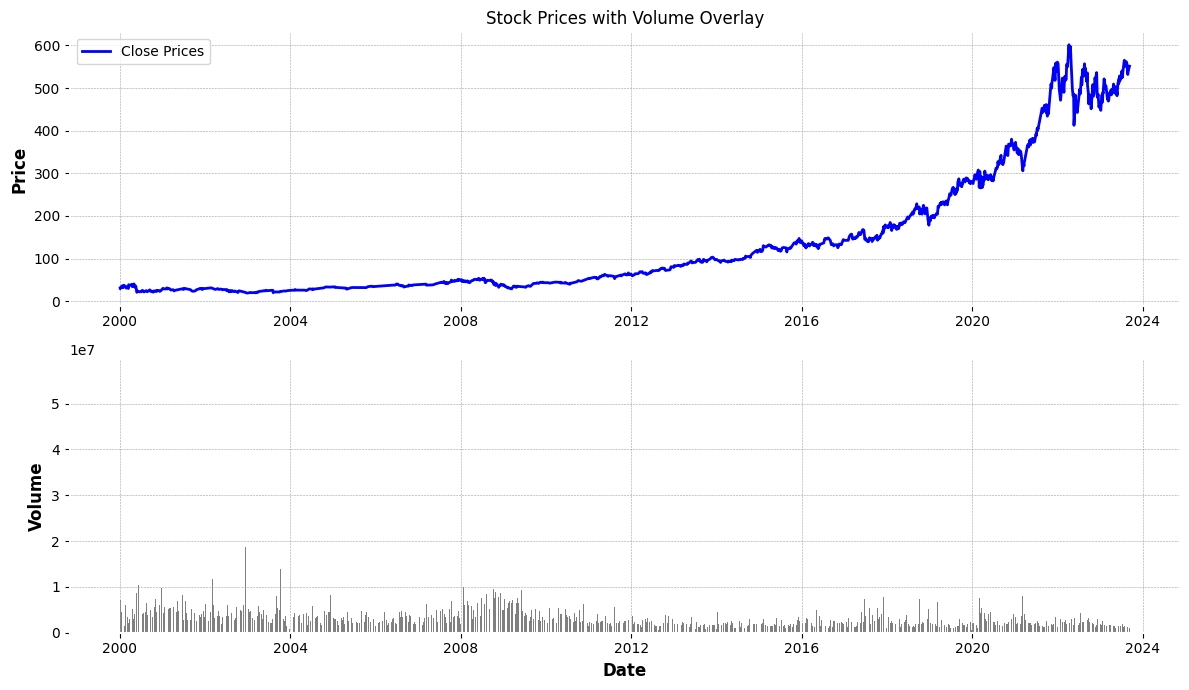

In [ ]:
plt.figure(figsize=(12, 7))
plt.subplot(2, 1, 1)
plt.plot(df['Close'], label='Close Prices', color='blue')
plt.title('Stock Prices with Volume Overlay')
plt.ylabel('Price')
plt.legend()


plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], color='grey')
plt.xlabel('Date')
plt.ylabel('Volume')

plt.tight_layout()
plt.show()


<ipython-input-12-878fabedd092>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(daily_returns, bins=50, hist=True, kde=True, color='blue')


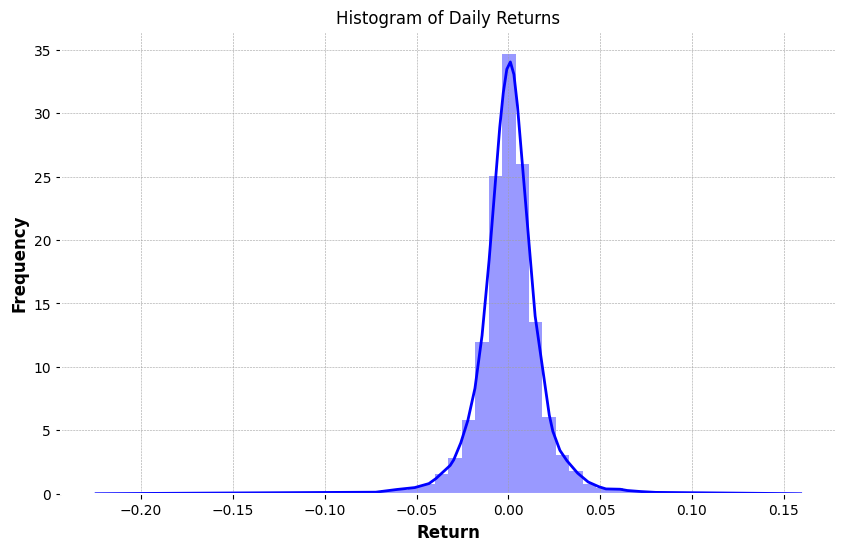

In [ ]:

daily_returns = df['Close'].pct_change().dropna()

plt.figure(figsize=(10, 6))
sns.distplot(daily_returns, bins=50, hist=True, kde=True, color='blue')
plt.title('Histogram of Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


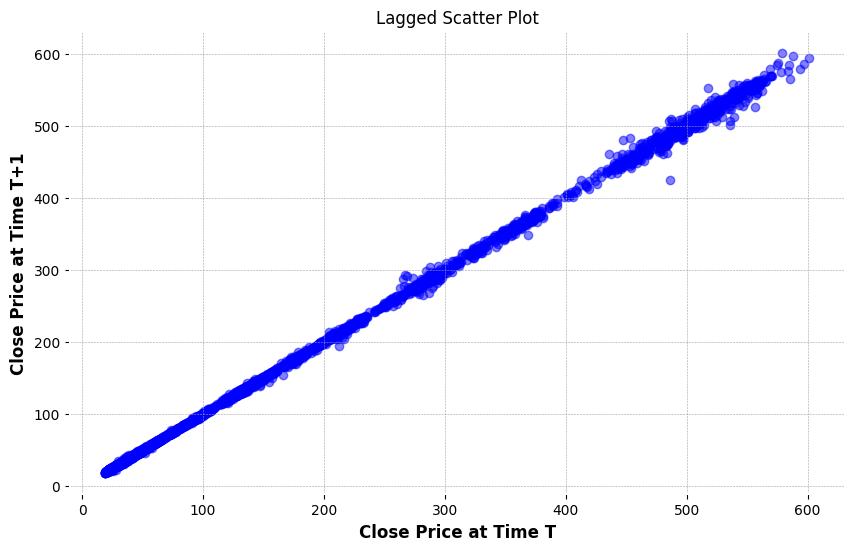

In [ ]:
lag = df['Close'].shift(-1)

plt.figure(figsize=(10, 6))
plt.scatter(df['Close'], lag, alpha=0.5, color='blue')
plt.title('Lagged Scatter Plot')
plt.xlabel('Close Price at Time T')
plt.ylabel('Close Price at Time T+1')
plt.grid(True)
plt.show()


In [ ]:
unique_counts = df['Time'].value_counts().unique()
print(unique_counts)


[3788 2172]


In [ ]:
dates_with_two_unique_times = df.groupby('Date')['Time'].nunique()
dates_with_two_unique_times = dates_with_two_unique_times[dates_with_two_unique_times == 2].index.tolist()

print(dates_with_two_unique_times)


[]


In [ ]:
unique_times_per_date = df.groupby('Date')['Time'].nunique()

print(unique_times_per_date)


Date
2000-01-03    1
2000-01-04    1
2000-01-05    1
2000-01-06    1
2000-01-07    1
             ..
2023-09-01    1
2023-09-05    1
2023-09-06    1
2023-09-07    1
2023-09-08    1
Name: Time, Length: 5959, dtype: int64


Epoch 1/100
75/75 - 2s - loss: 3.9188e-04 - 2s/epoch - 32ms/step
Epoch 2/100
75/75 - 0s - loss: 1.0331e-05 - 326ms/epoch - 4ms/step
Epoch 3/100
75/75 - 0s - loss: 9.8641e-06 - 310ms/epoch - 4ms/step
Epoch 4/100
75/75 - 0s - loss: 9.7394e-06 - 300ms/epoch - 4ms/step
Epoch 5/100
75/75 - 0s - loss: 9.8887e-06 - 297ms/epoch - 4ms/step
Epoch 6/100
75/75 - 0s - loss: 9.5314e-06 - 301ms/epoch - 4ms/step
Epoch 7/100
75/75 - 0s - loss: 9.4165e-06 - 288ms/epoch - 4ms/step
Epoch 8/100
75/75 - 0s - loss: 9.7981e-06 - 303ms/epoch - 4ms/step
Epoch 9/100
75/75 - 0s - loss: 9.1797e-06 - 296ms/epoch - 4ms/step
Epoch 10/100
75/75 - 0s - loss: 9.6825e-06 - 293ms/epoch - 4ms/step
Epoch 11/100
75/75 - 0s - loss: 9.0360e-06 - 353ms/epoch - 5ms/step
Epoch 12/100
75/75 - 0s - loss: 8.7084e-06 - 388ms/epoch - 5ms/step
Epoch 13/100
75/75 - 0s - loss: 8.1547e-06 - 386ms/epoch - 5ms/step
Epoch 14/100
75/75 - 0s - loss: 8.7164e-06 - 392ms/epoch - 5ms/step
Epoch 15/100
75/75 - 0s - loss: 8.8415e-06 - 381ms/epoch - 

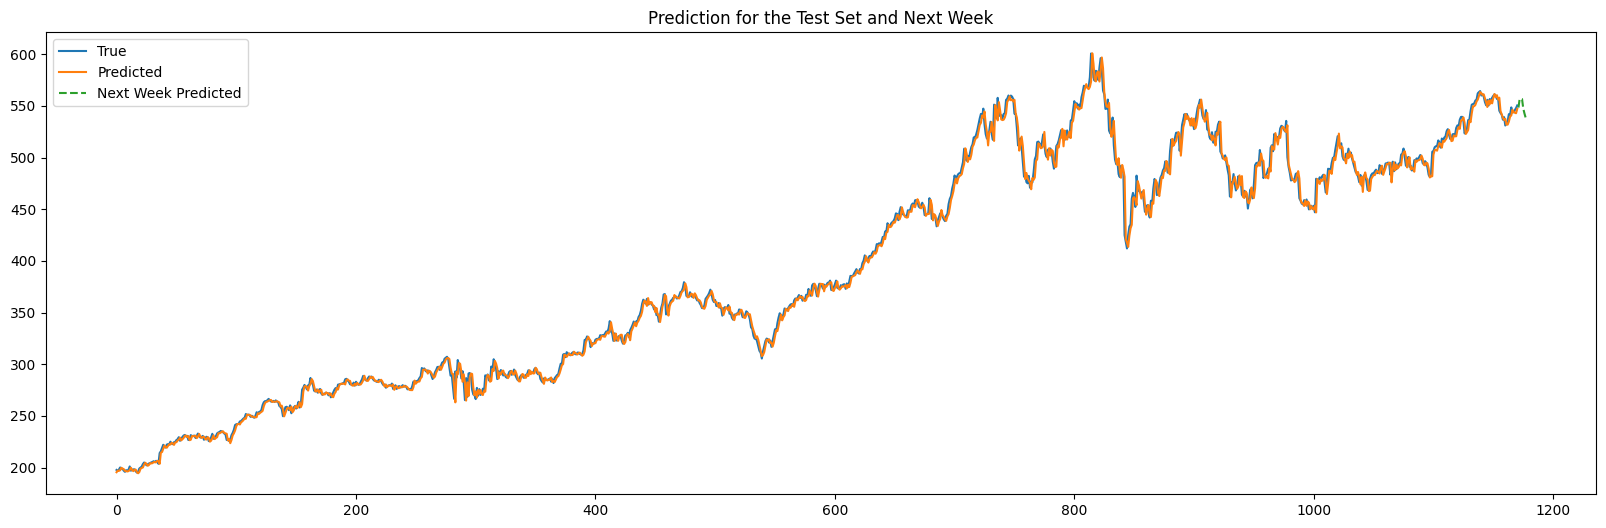

In [ ]:


# Drop unnecessary columns
# df = df.drop(columns=['Time', 'Volume', 'Brand_Name', 'Ticker', 'Industry_Tag', 'Country', 'Dividends', 'Stock Splits'])

# Using Date, Open, High, Low, Close columns
data_to_use = df[['Open', 'High', 'Low', 'Close']].values

scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(data_to_use)

train_size = int(len(normalized_data) * 0.8)
test_size = len(normalized_data) - train_size
train, test = normalized_data[0:train_size, :], normalized_data[train_size:len(normalized_data), :]

# Modify create_dataset to handle multiple features
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        dataX.append(dataset[i:(i + look_back), :])
        dataY.append(dataset[i + look_back, -1])  # Close price is the last column
    return np.array(dataX), np.array(dataY)

look_back = 20
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(LSTM(300, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))

opt = Adam(learning_rate=0.01, ema_momentum=0.9)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=2)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions to original scale
trainPredict = scaler.inverse_transform(np.c_[trainPredict, np.zeros(trainPredict.shape), np.zeros(trainPredict.shape), np.zeros(trainPredict.shape)])[:,0]
trainY_original = scaler.inverse_transform(np.c_[trainY, np.zeros(trainY.shape), np.zeros(trainY.shape), np.zeros(trainY.shape)])[:,0]
testPredict = scaler.inverse_transform(np.c_[testPredict, np.zeros(testPredict.shape), np.zeros(testPredict.shape), np.zeros(testPredict.shape)])[:,0]
testY_original = scaler.inverse_transform(np.c_[testY, np.zeros(testY.shape), np.zeros(testY.shape), np.zeros(testY.shape)])[:,0]

# Predict for next 7 days
last_known_data = normalized_data[-look_back:]
predictions = []

for _ in range(7):
    prediction = model.predict(last_known_data.reshape(1, look_back, 4))
    predictions.append(prediction[0][0])
    new_data_point = np.array([last_known_data[0, 1], last_known_data[0, 2], last_known_data[0, 3], prediction[0][0]]).reshape(1, 4)
    last_known_data = np.append(last_known_data[1:], new_data_point, axis=0)

next_week_predictions = scaler.inverse_transform(np.c_[predictions, np.zeros(len(predictions)), np.zeros(len(predictions)), np.zeros(len(predictions))])[:,0]
print(next_week_predictions)

# Calculate RMSE for train and test
trainScore = np.sqrt(mean_squared_error(trainY_original, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY_original, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# Plotting predictions for the test set and the next week
plt.figure(figsize=(20, 6))
plt.plot(np.arange(len(testY_original)), testY_original, label="True")
plt.plot(np.arange(len(testPredict)), testPredict, label="Predicted")
plt.plot(np.arange(len(testPredict), len(testPredict) + 7), next_week_predictions, label="Next Week Predicted", linestyle='--')
plt.legend()
plt.title("Prediction for the Test Set and Next Week")
plt.show()


Trial 2

Reference - ModAugNet: A new forecasting framework for stock market index value with an overfitting prevention LSTM module and a prediction LSTM module. Expert Systems with Applications. https://www.sciencedirect.com/science/article/abs/pii/S0957417418304342

Epoch 1/100
75/75 - 7s - loss: 1.6305 - 7s/epoch - 93ms/step
Epoch 2/100
75/75 - 1s - loss: 0.0425 - 952ms/epoch - 13ms/step
Epoch 3/100
75/75 - 1s - loss: 8.9331e-04 - 918ms/epoch - 12ms/step
Epoch 4/100
75/75 - 1s - loss: 7.3803e-04 - 593ms/epoch - 8ms/step
Epoch 5/100
75/75 - 1s - loss: 7.2274e-04 - 568ms/epoch - 8ms/step
Epoch 6/100
75/75 - 1s - loss: 5.0477e-04 - 562ms/epoch - 7ms/step
Epoch 7/100
75/75 - 1s - loss: 6.6590e-04 - 585ms/epoch - 8ms/step
Epoch 8/100
75/75 - 1s - loss: 8.9105e-04 - 614ms/epoch - 8ms/step
Epoch 9/100
75/75 - 1s - loss: 7.3991e-04 - 568ms/epoch - 8ms/step
Epoch 10/100
75/75 - 1s - loss: 4.9228e-04 - 593ms/epoch - 8ms/step
Epoch 11/100
75/75 - 1s - loss: 4.9478e-04 - 940ms/epoch - 13ms/step
Epoch 12/100
75/75 - 1s - loss: 5.9556e-04 - 984ms/epoch - 13ms/step
Epoch 13/100
75/75 - 1s - loss: 7.0927e-04 - 923ms/epoch - 12ms/step
Epoch 14/100
75/75 - 1s - loss: 4.4700e-04 - 858ms/epoch - 11ms/step
Epoch 15/100
75/75 - 1s - loss: 4.8340e-04 - 827ms/epoch - 11

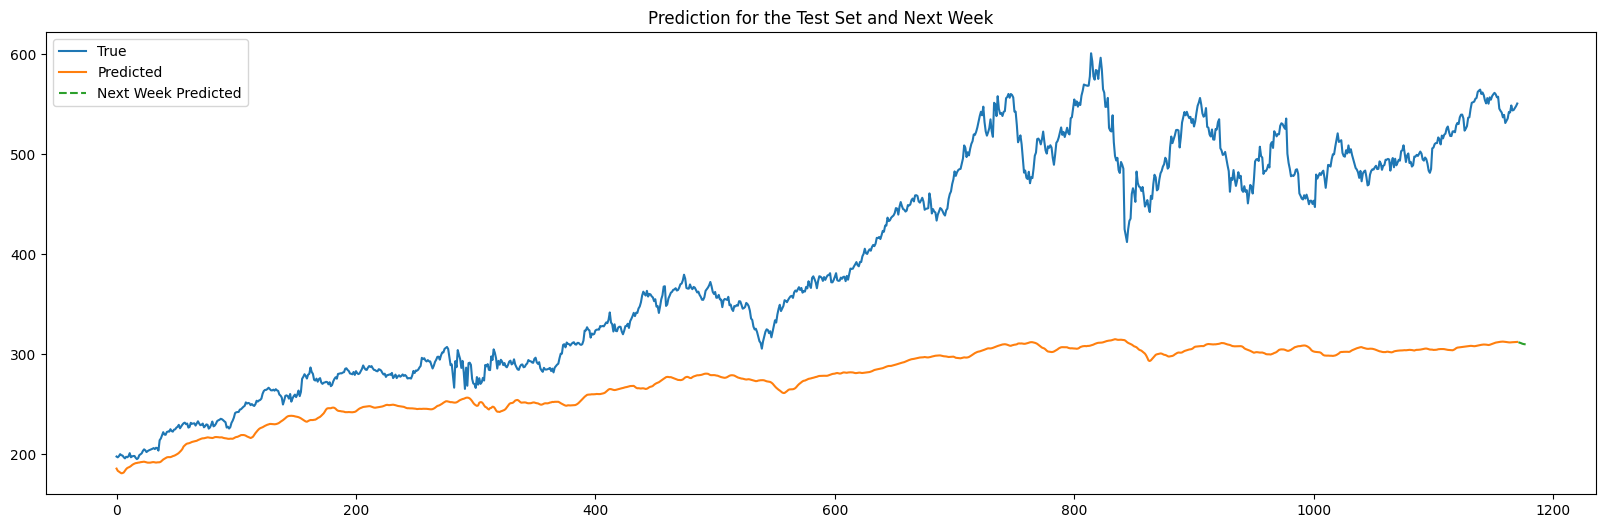

In [21]:
from keras.optimizers import Adam
from keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Using Date, Open, High, Low, Close columns
data_to_use = df[['Open', 'High', 'Low', 'Close']].values

scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(data_to_use)

train_size = int(len(normalized_data) * 0.8)
test_size = len(normalized_data) - train_size
train, test = normalized_data[0:train_size, :], normalized_data[train_size:len(normalized_data), :]

# Modify create_dataset to handle multiple features
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        dataX.append(dataset[i:(i + look_back), :])
        dataY.append(dataset[i + look_back, -1])  # Close price is the last column
    return np.array(dataX), np.array(dataY)

look_back = 20
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Define learning rate decay
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True)

model = Sequential()
# Overfitting prevention LSTM module with more dropout and regularizations
model.add(LSTM(150, return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2]), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(LSTM(150, return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))

# Prediction LSTM module with regularization
model.add(LSTM(150, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(1))

# Using the learning rate decay schedule in the optimizer
opt = Adam(learning_rate=lr_schedule)
model.compile(loss='mean_squared_error', optimizer=opt)
model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=2)


trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions to original scale
trainPredict = scaler.inverse_transform(np.c_[trainPredict, np.zeros(trainPredict.shape), np.zeros(trainPredict.shape), np.zeros(trainPredict.shape)])[:,0]
trainY_original = scaler.inverse_transform(np.c_[trainY, np.zeros(trainY.shape), np.zeros(trainY.shape), np.zeros(trainY.shape)])[:,0]
testPredict = scaler.inverse_transform(np.c_[testPredict, np.zeros(testPredict.shape), np.zeros(testPredict.shape), np.zeros(testPredict.shape)])[:,0]
testY_original = scaler.inverse_transform(np.c_[testY, np.zeros(testY.shape), np.zeros(testY.shape), np.zeros(testY.shape)])[:,0]

# Predict for next 7 days
last_known_data = normalized_data[-look_back:]
predictions = []

for _ in range(7):
    prediction = model.predict(last_known_data.reshape(1, look_back, 4))
    predictions.append(prediction[0][0])
    new_data_point = np.array([last_known_data[0, 1], last_known_data[0, 2], last_known_data[0, 3], prediction[0][0]]).reshape(1, 4)
    last_known_data = np.append(last_known_data[1:], new_data_point, axis=0)

next_week_predictions = scaler.inverse_transform(np.c_[predictions, np.zeros(len(predictions)), np.zeros(len(predictions)), np.zeros(len(predictions))])[:,0]
print(next_week_predictions)

# Calculate RMSE for train and test
trainScore = np.sqrt(mean_squared_error(trainY_original, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY_original, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# Plotting predictions for the test set and the next week
plt.figure(figsize=(20, 6))
plt.plot(np.arange(len(testY_original)), testY_original, label="True")
plt.plot(np.arange(len(testPredict)), testPredict, label="Predicted")
plt.plot(np.arange(len(testPredict), len(testPredict) + 7), next_week_predictions, label="Next Week Predicted", linestyle='--')
plt.legend()
plt.title("Prediction for the Test Set and Next Week")
plt.show()

Fine Tuning

In [ ]:
pip install keras-tuner

In [23]:

from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers.schedules import ExponentialDecay

class LSTMHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()

        # Allow kerastuner to decide number of units
        model.add(LSTM(units=hp.Int('units', min_value=50, max_value=300, step=50),
                       return_sequences=True,
                       input_shape=self.input_shape,
                       kernel_regularizer=l2(hp.Float('l2', min_value=1e-4, max_value=1e-2, sampling='LOG'))))
        model.add(Dropout(hp.Float('dropout', min_value=0, max_value=0.5, step=0.1)))

        # You can add more LSTM layers if needed
        model.add(LSTM(units=hp.Int('units', min_value=50, max_value=300, step=50),
                       kernel_regularizer=l2(hp.Float('l2', min_value=1e-4, max_value=1e-2, sampling='LOG'))))
        model.add(Dropout(hp.Float('dropout', min_value=0, max_value=0.5, step=0.1)))

        model.add(Dense(1))

        # Compile the model
        lr_schedule = ExponentialDecay(
            initial_learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG'),
            decay_steps=1000,
            decay_rate=0.9,
            staircase=True)

        model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='mean_squared_error')

        return model


# Create a HyperModel instance
hypermodel = LSTMHyperModel(input_shape=(trainX.shape[1], trainX.shape[2]))

# Instantiate the tuner
tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=2,
    directory='my_dir',
    project_name='lstm_hyperopt'
)

# Display search space summary
tuner.search_space_summary()

# Adding Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

from tensorflow.keras.callbacks import EarlyStopping
# Perform the hyperparameter search
tuner.search(trainX, trainY, epochs=100, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal number of units in the first LSTM layer is {best_hps.get('units')}
and the optimal dropout rate is {best_hps.get('dropout')}.
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
The optimal L2 regularization is {best_hps.get('l2')}.
""")

# Build the model with the best hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
history = model.fit(trainX, trainY, epochs=100, validation_split=0.2, verbose=2)


Trial 5 Complete [00h 00m 57s]
val_loss: 0.0010103281820192933

Best val_loss So Far: 0.00010276219109073281
Total elapsed time: 00h 22m 09s

The hyperparameter search is complete. The optimal number of units in the first LSTM layer is 150
and the optimal dropout rate is 0.2.
The optimal learning rate for the optimizer is 0.0006787382663078123.
The optimal L2 regularization is 0.00026537414895502884.

Epoch 1/100
119/119 - 6s - loss: 0.0228 - val_loss: 0.0032 - 6s/epoch - 48ms/step
Epoch 2/100
119/119 - 1s - loss: 9.4350e-04 - val_loss: 2.4262e-04 - 833ms/epoch - 7ms/step
Epoch 3/100
119/119 - 1s - loss: 1.2860e-04 - val_loss: 2.0198e-04 - 827ms/epoch - 7ms/step
Epoch 4/100
119/119 - 1s - loss: 7.5503e-05 - val_loss: 2.1514e-04 - 846ms/epoch - 7ms/step
Epoch 5/100
119/119 - 1s - loss: 6.5795e-05 - val_loss: 4.4394e-04 - 789ms/epoch - 7ms/step
Epoch 6/100
119/119 - 1s - loss: 5.9957e-05 - val_loss: 1.3799e-04 - 796ms/epoch - 7ms/step
Epoch 7/100
119/119 - 1s - loss: 6.5450e-05 - val_los

1/1 [==============================] - 0s 19ms/step
[508.59263634 507.81269241 507.25808179 506.80058266 506.72122871
 506.9142031  507.24590818]
Train Score: 4.02 RMSE
Test Score: 25.76 RMSE


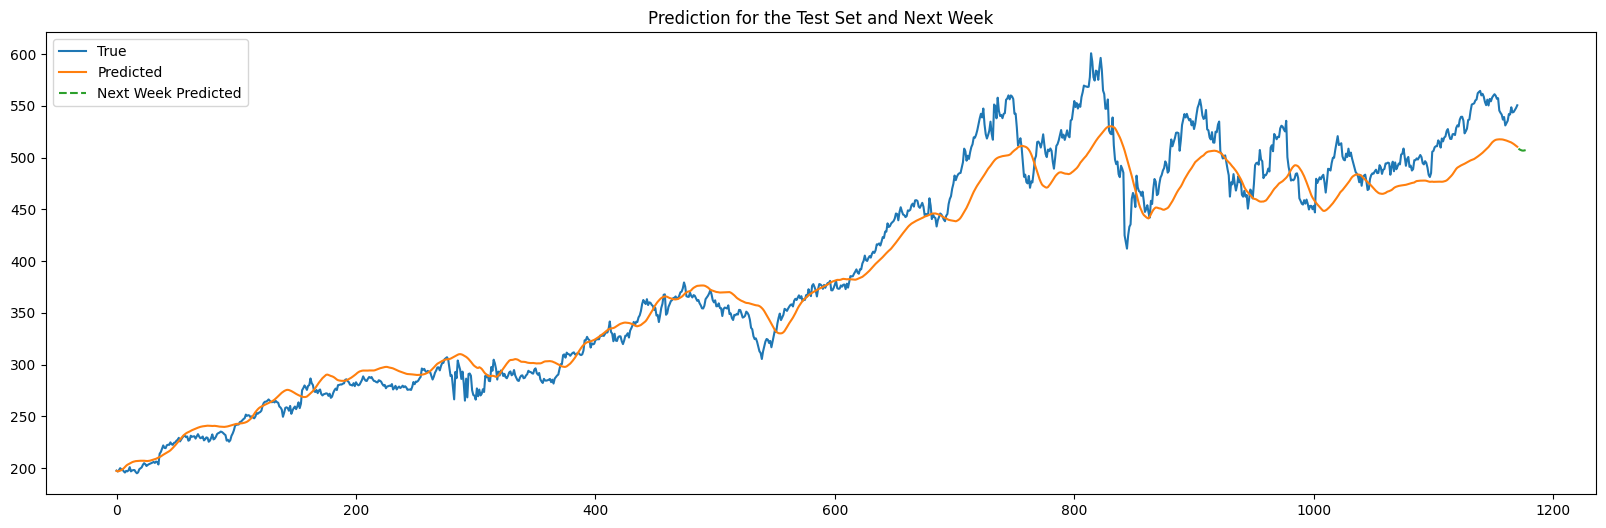

In [24]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions to original scale
trainPredict = scaler.inverse_transform(np.c_[trainPredict, np.zeros(trainPredict.shape), np.zeros(trainPredict.shape), np.zeros(trainPredict.shape)])[:,0]
trainY_original = scaler.inverse_transform(np.c_[trainY, np.zeros(trainY.shape), np.zeros(trainY.shape), np.zeros(trainY.shape)])[:,0]
testPredict = scaler.inverse_transform(np.c_[testPredict, np.zeros(testPredict.shape), np.zeros(testPredict.shape), np.zeros(testPredict.shape)])[:,0]
testY_original = scaler.inverse_transform(np.c_[testY, np.zeros(testY.shape), np.zeros(testY.shape), np.zeros(testY.shape)])[:,0]

# Predict for next 7 days
last_known_data = normalized_data[-look_back:]
predictions = []

for _ in range(7):
    prediction = model.predict(last_known_data.reshape(1, look_back, 4))
    predictions.append(prediction[0][0])
    new_data_point = np.array([last_known_data[0, 1], last_known_data[0, 2], last_known_data[0, 3], prediction[0][0]]).reshape(1, 4)
    last_known_data = np.append(last_known_data[1:], new_data_point, axis=0)

next_week_predictions = scaler.inverse_transform(np.c_[predictions, np.zeros(len(predictions)), np.zeros(len(predictions)), np.zeros(len(predictions))])[:,0]
print(next_week_predictions)

# Calculate RMSE for train and test
trainScore = np.sqrt(mean_squared_error(trainY_original, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY_original, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# Plotting predictions for the test set and the next week
plt.figure(figsize=(20, 6))
plt.plot(np.arange(len(testY_original)), testY_original, label="True")
plt.plot(np.arange(len(testPredict)), testPredict, label="Predicted")
plt.plot(np.arange(len(testPredict), len(testPredict) + 7), next_week_predictions, label="Next Week Predicted", linestyle='--')
plt.legend()
plt.title("Prediction for the Test Set and Next Week")
plt.show()

Trial 3 - Arima

In [25]:
pip install statsmodels pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.6 MB/s eta 0:00:00


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=14.91 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=17392.368, Time=0.29 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=16131.916, Time=0.77 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.52 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=17390.368, Time=0.12 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=15547.596, Time=0.47 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=15273.108, Time=0.64 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=15095.323, Time=0.78 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=14911.263, Time=1.07 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=13.50 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=9.23 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=14909.263, Time=0.50 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=15093.323, Time=0.40 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=3.70 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, 

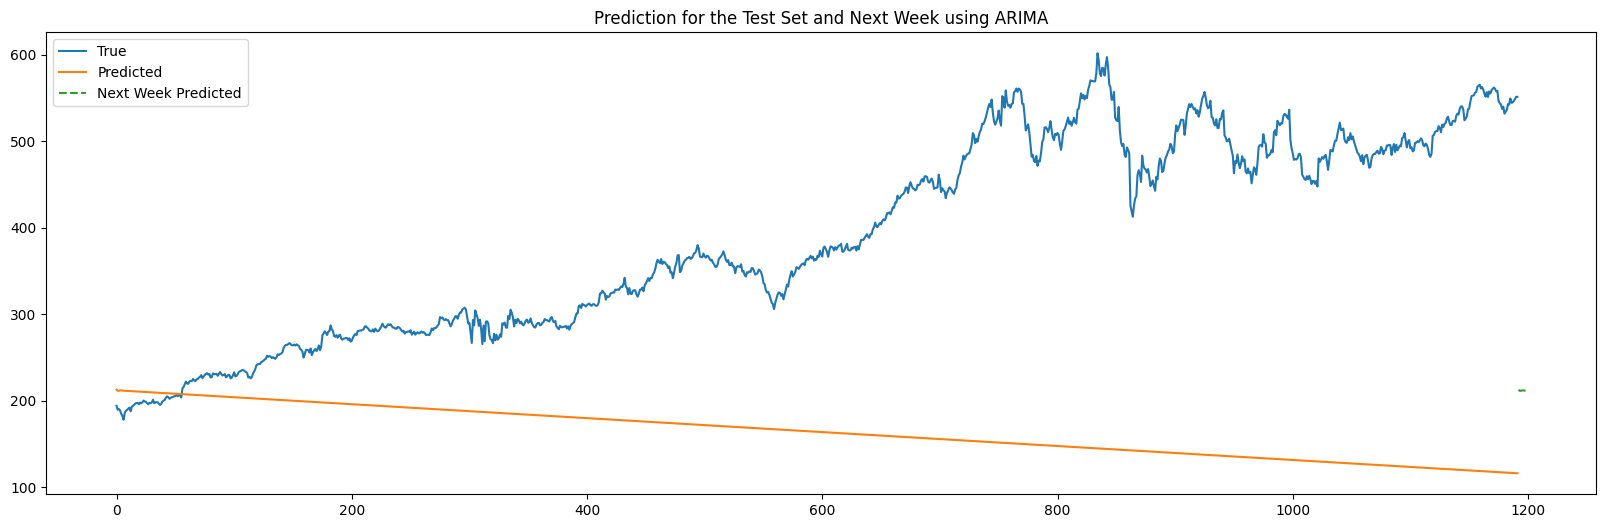

In [26]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Assuming df is your dataframe, and you've loaded it earlier
# Use only the 'Close' column for the ARIMA model
data_to_use = df['Close'].values

train_size = int(len(data_to_use) * 0.8)
train, test = data_to_use[0:train_size], data_to_use[train_size:]

# Use auto_arima to find the best (p, d, q) parameters
best_model = auto_arima(train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
best_model.summary()

# Fit the ARIMA model with best parameters
model = ARIMA(train, order=best_model.order)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Calculate RMSE for the test data
rmse = np.sqrt(mean_squared_error(test, forecast))
print('Test RMSE: %.2f' % rmse)

# Forecast for the next 7 days
forecast_next_week = model_fit.forecast(steps=7)
print("Predictions for the next week:", forecast_next_week)

# Plotting predictions for the test set and the next week
plt.figure(figsize=(20, 6))
plt.plot(np.arange(len(test)), test, label="True")
plt.plot(np.arange(len(test)), forecast, label="Predicted")
plt.plot(np.arange(len(test), len(test) + 7), forecast_next_week, label="Next Week Predicted", linestyle='--')
plt.legend()
plt.title("Prediction for the Test Set and Next Week using ARIMA")
plt.show()
